# Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

# Reading The Data

In [2]:
data_dir = '../input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(data_dir)

# Data Exploration

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Set Date column as an index

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

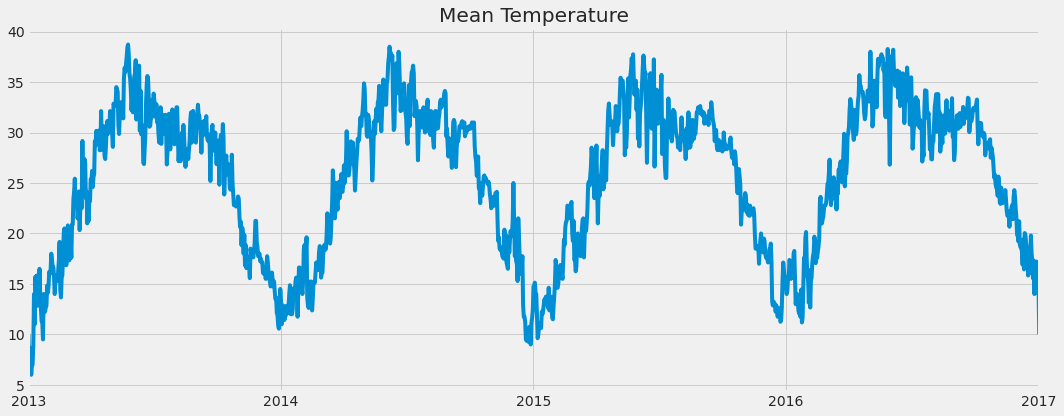

In [8]:
plt.figure(figsize=(15, 6))
df['meantemp'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Temperature")
plt.tight_layout()
plt.show()

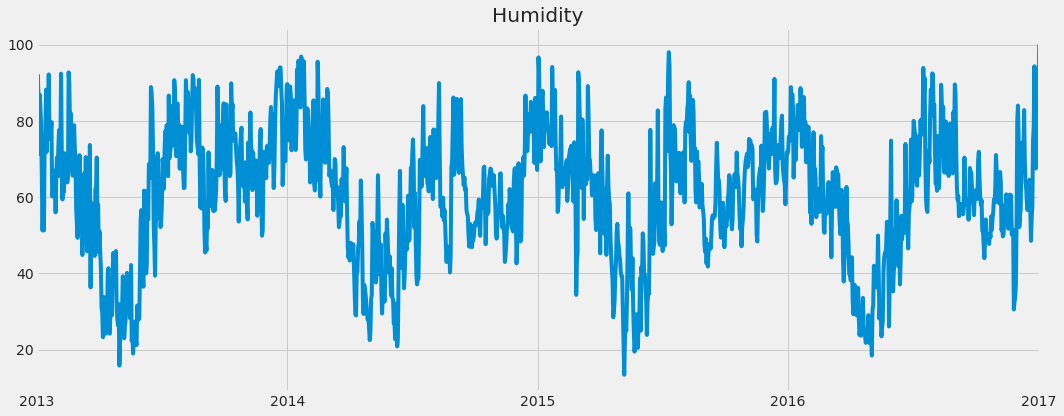

In [9]:
plt.figure(figsize=(15, 6))
df['humidity'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Humidity")
plt.tight_layout()
plt.show()

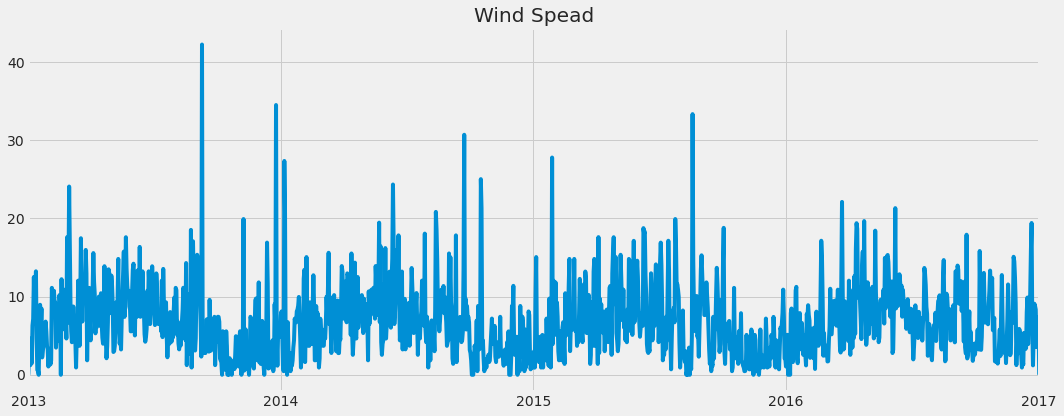

In [10]:
plt.figure(figsize=(15, 6))
df['wind_speed'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Wind Spead")
plt.tight_layout()
plt.show()

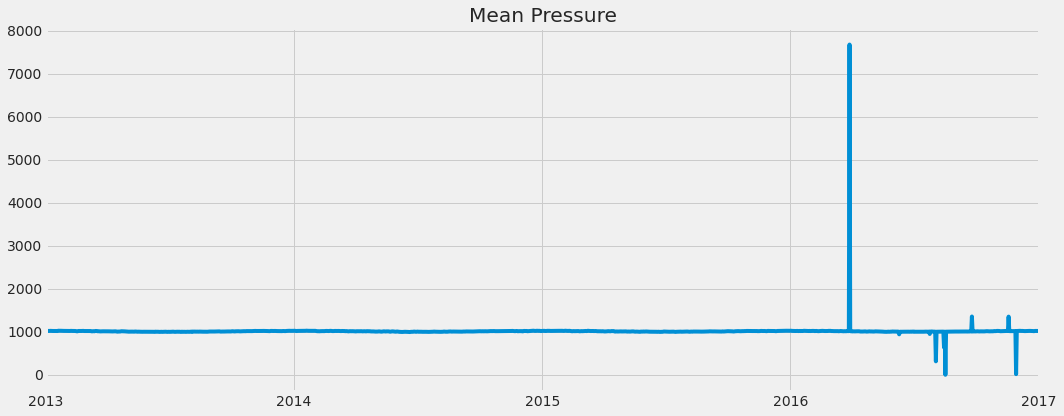

In [11]:
plt.figure(figsize=(15, 6))
df['meanpressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Pressure")
plt.tight_layout()
plt.show()

# Data Preprocessing

### Choosing Prediction Column

In [12]:
n_cols = 1
dataset = df["meantemp"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1462, 1)

### Normalizing Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Splitting Data

In [14]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1096 Test Size : 366


In [15]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1096, 1)

### Creating training set

In [16]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       [0.08151383],
       [0.        ],
       [0.03056769],
       [0.03056769],
       [0.08733624],
       [0.24454148],
       [0.15283843],
       [0.29694323],
       [0.24454148],
       [0.30058224],
       [0.20887918],
       [0.26637555],
       [0.23944687],
       [0.3209607 ],
       [0.23944687],
       [0.19868996],
       [0.16157205],
       [0.15895197],
       [0.1069869 ],
       [0.24454148],
       [0.23944687],
       [0.19104803],
       [0.20378457],
       [0.20960699],
       [0.27001456],
       [0.24836245],
       [0.26637555],
       [0.31179039],
       [0.30567686],
       [0.31441048],
       [0.36681223],
       [0.34934498],
       [0.32478166],
       [0.32605531],
       [0.29344978],
       [0.24454148],
       [0.28820961],
       [0.28275109],
       [0.3018559 ],
       [0.2852984 ],
       [0.31441048],
       [0.34643377],
       [0.40247453],
       [0.25764192],
  

In [17]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [19]:
x_train.shape , y_train.shape

((1402, 60, 1), (1402, 1))

# LSTM Model

### Model Structure

In [20]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

2022-11-14 21:16:32.532916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 21:16:32.626703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 21:16:32.627481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 21:16:32.628619: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [22]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100


2022-11-14 21:16:35.951756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-14 21:16:39.592999: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


44/44 [==============================] - 5s 7ms/step - loss: 0.0288 - mean_absolute_error: 0.1197
Epoch 2/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0577
Epoch 3/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0542
Epoch 4/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0540
Epoch 5/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0542
Epoch 6/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0530
Epoch 7/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0521
Epoch 8/100
44/44 [==============================] - 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0530
Epoch 9/100
44/44 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0532
Epoch 10/100
44/44 [==

### Model Evaluation

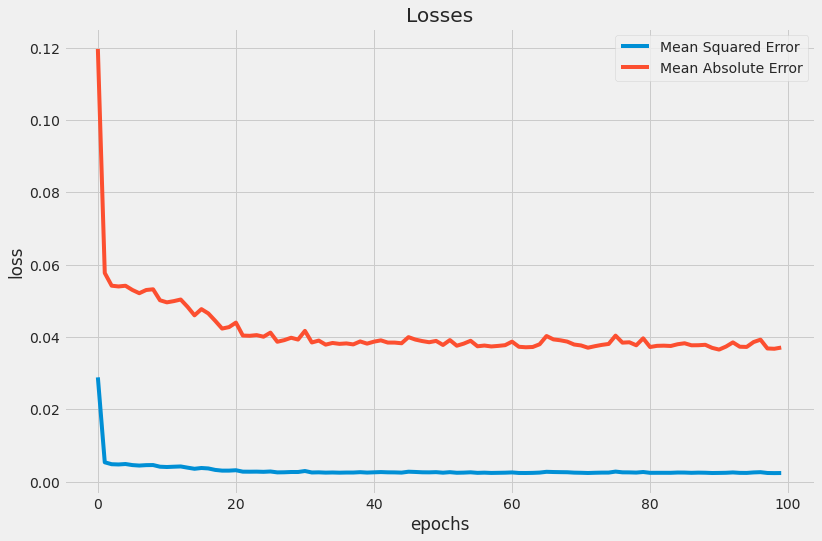

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Predection

### Creating testing set

In [24]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [25]:
# Get Prediction
predictions = model.predict(x_test)

In [26]:
predictions.shape

(366, 1)

In [27]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(366, 1)

### Root mean square error

In [28]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [29]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

0.33

In [30]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,14.404666,14.000000
1,13.893016,14.375000
2,13.989755,15.750000
3,14.925040,15.833333
4,15.263550,17.375000
...,...,...
361,16.665710,17.217391
362,16.910908,15.238095
363,15.630417,14.095238
364,14.517913,15.052632


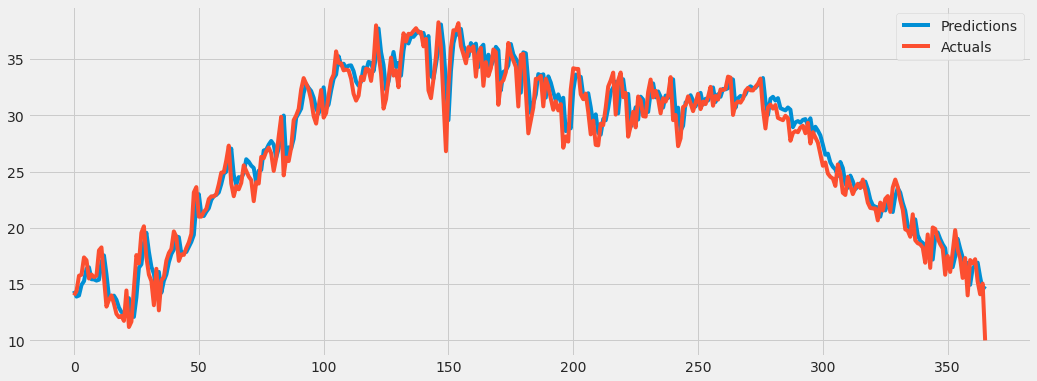

In [31]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize Predictions with The Data
for one feature

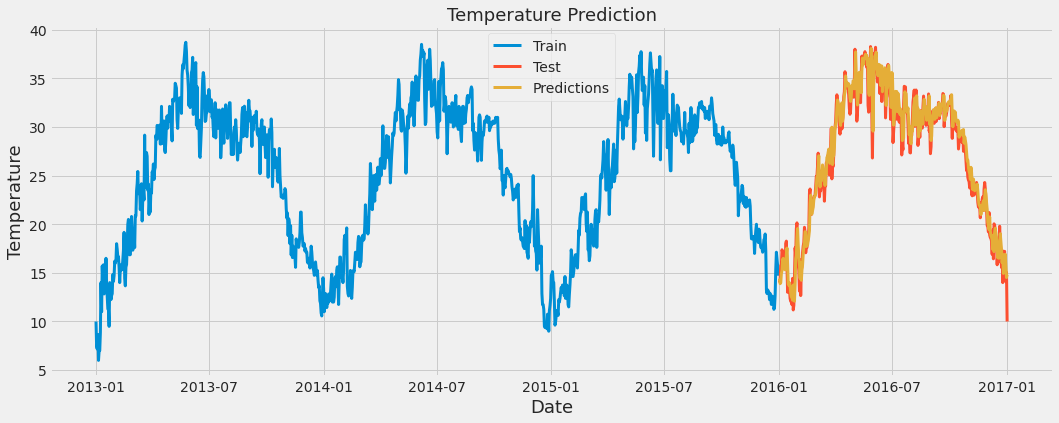

In [32]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['meantemp'], linewidth= 3)
plt.plot(test['meantemp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariate Predection

In [33]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


### Chose Columns

In [34]:
n_cols = 4
# date	meantemp	humidity	wind_speed	meanpressure
cols = list(df.loc[:, ['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1462, 4)

## Data Preprocessing

### Data Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Data Splitting

In [36]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1096 Test Size : 366


In [37]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1096, 4)

### Creating Train Data

In [38]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 4

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.12227074, 0.8209571 , 0.        , 0.13260331],
       [0.04279476, 0.90759076, 0.07058266, 0.132881  ],
       [0.0356623 , 0.84983498, 0.10974262, 0.13299381],
       [0.08151383, 0.66886689, 0.02921206, 0.13279856],
       [0.        , 0.84790979, 0.08763619, 0.13271178],
       [0.03056769, 0.80132013, 0.03505448, 0.13290703],
       [0.03056769, 0.75280528, 0.14921838, 0.13316737],
       [0.08733624, 0.58085809, 0.16918184, 0.13300001],
       [0.24454148, 0.43688119, 0.29606821, 0.13277686],
       [0.15283843, 0.56105611, 0.17527238, 0.13260331],
       [0.29694323, 0.43729373, 0.25038912, 0.13266529],
       [0.24454148, 0.69966997, 0.31332476, 0.13259091],
       [0.30058224, 0.71314631, 0.10974262, 0.13229958],
       [0.20887918, 0.86331133, 0.01460603, 0.13253822],
       [0.26637555, 0.67491749, 0.01251946, 0.1326281 ],
       [0.23944687, 0.8459846 , 0.        , 0.13273348],
       [0.3209607 , 0.77860286, 0.12434865, 0.132625  ],
       [0.23944687, 

In [39]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape , y_train.shape

((1036, 60, 4), (1036, 4))

## Model Structure

In [41]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            11000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 43,116
Trainable params: 43,116
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [43]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
33/33 [==============================] - 3s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.1296
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0646
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0622
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0614
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0596
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0611
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0592
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0579
Epoch 9/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0572
Epoch 10/1

### Model Evaluation

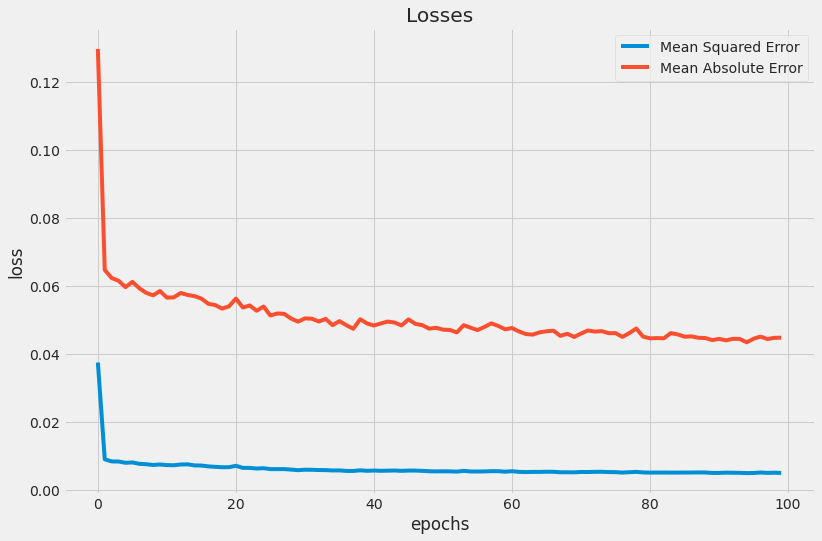

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Prediction


### Creating Test Data

In [45]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 4

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [46]:
x_test.shape , y_test.shape

((366, 60, 4), (366, 4))

In [47]:
# Get Prediction
predictions = model2.predict(x_test)

In [48]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [49]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

277.78